In [170]:
import detection

import os

import numpy as np

from skimage.feature import hog
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from scipy.ndimage.measurements import label

import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
svc = detection.train_model()

(8792, 8968)


/home/jeph/CarND-Vehicle-Detection/env/local/lib/python2.7/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


('Test Accuracy:', 0.98676801801801806)


In [3]:
model = svc['model']
scaler = svc['scaler']

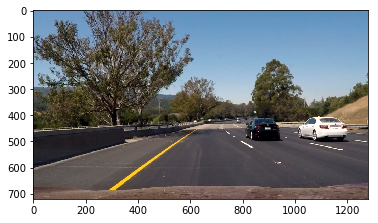

In [4]:
img = mpimg.imread('./test_images/test6.jpg')
plt.imshow(img)

In [77]:
img.shape

(720, 1280, 3)

In [78]:
reload(detection)
vd = detection.VehicleDetector(model, scaler)

In [55]:
def draw_boxes(img, bboxes, color=(0, 0, 255), thick=6):
    # Make a copy of the image
    imcopy = np.copy(img)
    # Iterate through the bounding boxes
    for bbox in bboxes:
        # Draw a rectangle given bbox coordinates
        cv2.rectangle(imcopy, bbox[0], bbox[1], color, thick)
    # Return the image copy with boxes drawn
    return imcopy

def generate_all_windows(img, overlap=0.75):
    windows = []
    windows += vd.slide_window(img, x_start_stop=[400,None], y_start_stop=[350,680])
    windows += vd.slide_window(img, x_start_stop=[400,None], y_start_stop=[350,680], 
                               xy_window=(128,128), xy_overlap=(0.75, 0.75))
    windows += vd.slide_window(img, x_start_stop=[400,None], y_start_stop=[350,680], 
                               xy_window=(192,192), xy_overlap=(0.9, 0.9))
    return windows
    
#     windows += vd.slide_window(img, x_start_stop=[704, None], 
#                             y_start_stop=[375, 439], xy_window=(int(96*1.25), 96), 
#                             xy_overlap=(overlap, overlap))
#     windows += vd.slide_window(img, x_start_stop=[768, None], 
#                             y_start_stop=[375, 567], xy_window=(int(96*1.25), 96), 
#                             xy_overlap=(overlap*0.9, overlap*0.9))
#     windows += vd.slide_window(img, x_start_stop=[768, None], 
#                             y_start_stop=[375, 695], xy_window=(int(224*1.25), 224), 
#                             xy_overlap=(overlap, overlap))
#     return windows

698


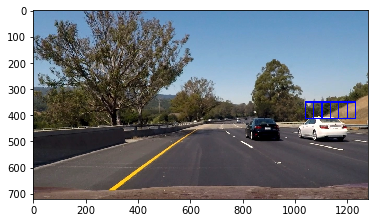

In [56]:
windows = generate_all_windows(img)
print(len(windows))
plt.imshow(draw_boxes(img, windows[20:25], thick=3, ))

In [81]:
from detection import extract_feature
reload(detection)

<module 'detection' from 'detection.py'>

In [30]:
def extract_img(window):
    return cv2.resize(img[window[0][1]:window[1][1], window[0][0]:window[1][0]], (64, 64))

def test_img(window):
    img = extract_img(window)
    features = extract_feature(img)
    predict = model.predict(scaler.transform(np.array(features).reshape(1, -1)))
    return predict

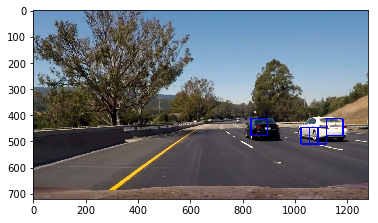

In [15]:
model.predict(windows[66])

In [23]:
features = extract_feature(extract_img(windows[66]))

In [26]:
features.shape

(8460,)

In [135]:
test_img(windows[60])

IndexError: list index out of range

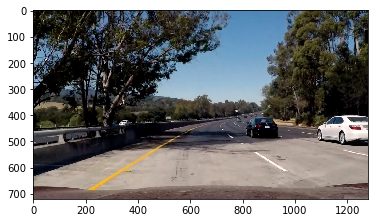

In [162]:
img = mpimg.imread('./test_images/test5.jpg')
plt.imshow(img)
plt.imshow(draw_boxes(img, vd.search_windows(img, windows)))

In [163]:
windows = vd.search_windows(img, windows)

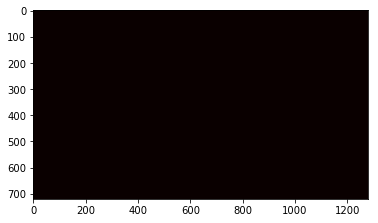

In [164]:
plt.imshow(vd.generate_heatmap(img, windows, 2), cmap='hot')

In [215]:
reload(detection)
vd = detection.VehicleDetector(model, scaler)
img = mpimg.imread('./test_images/test6.jpg')

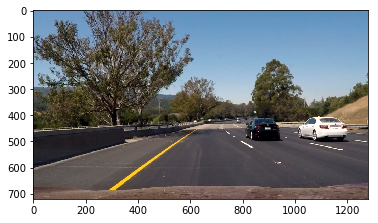

In [216]:
plt.imshow(img)

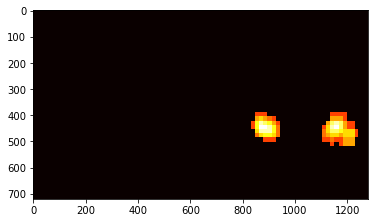

In [208]:
plt.imshow(vd.generate_heatmap(img, vd.search_windows(img, vd.windows), threshold=5), cmap='hot')

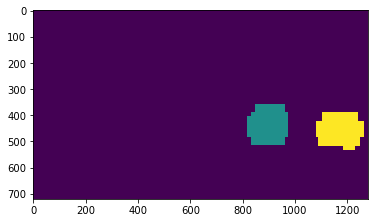

In [209]:
labels = label(vd.generate_heatmap(img, vd.search_windows(img, vd.windows), threshold=5))
plt.imshow(labels[0])

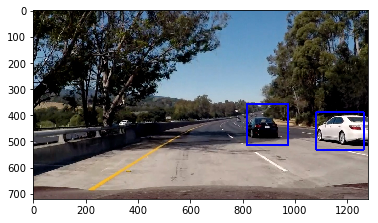

In [210]:
plt.imshow(vd._draw_bboxes(img, labels))

In [93]:
zz = vd.generate_heatmap(img, windows, 5)

In [133]:
reload(detection)
# vd = detection.VehicleDetector(model, scaler)
def create_video(input_file='./project_video.mp4', output_file='./output.mp4'):
    from moviepy.editor import VideoFileClip

    vd = detection.VehicleDetector(model, scaler)
    clip = VideoFileClip(input_file)
    out_clip = clip.fl_image(vd.draw) 
    out_clip.write_videofile(output_file, audio=False)

    return vd

In [134]:
vd = create_video()

[MoviePy] >>>> Building video ./output.mp4
[MoviePy] Writing video ./output.mp4




  0%|          | 0/1261 [00:00<?, ?it/s]

  0%|          | 1/1261 [00:03<1:15:09,  3.58s/it]

  0%|          | 2/1261 [00:07<1:15:12,  3.58s/it]

  0%|          | 3/1261 [00:10<1:15:01,  3.58s/it]

  0%|          | 4/1261 [00:14<1:14:39,  3.56s/it]

  0%|          | 5/1261 [00:17<1:14:15,  3.55s/it]

  0%|          | 6/1261 [00:21<1:13:51,  3.53s/it]

  1%|          | 7/1261 [00:24<1:13:33,  3.52s/it]

  1%|          | 8/1261 [00:28<1:13:13,  3.51s/it]

  1%|          | 9/1261 [00:31<1:13:08,  3.51s/it]

  1%|          | 10/1261 [00:35<1:12:54,  3.50s/it]

  1%|          | 11/1261 [00:38<1:12:45,  3.49s/it]

  1%|          | 12/1261 [00:42<1:12:47,  3.50s/it]

  1%|          | 13/1261 [00:45<1:12:44,  3.50s/it]

  1%|          | 14/1261 [00:49<1:12:44,  3.50s/it]

  1%|          | 15/1261 [00:52<1:12:42,  3.50s/it]

  1%|▏         | 16/1261 [00:56<1:12:40,  3.50s/it]

  1%|▏         | 17/1261 [00:59<1:12:45,  3.51s/it]

  1%|▏         | 18/1261 [01:03<1:12:48,  3.51s/it]

  2%|▏     

 11%|█         | 138/1261 [08:03<1:05:44,  3.51s/it]

 11%|█         | 139/1261 [08:07<1:05:38,  3.51s/it]

 11%|█         | 140/1261 [08:10<1:05:39,  3.51s/it]

 11%|█         | 141/1261 [08:14<1:05:42,  3.52s/it]

 11%|█▏        | 142/1261 [08:17<1:05:47,  3.53s/it]

 11%|█▏        | 143/1261 [08:21<1:05:46,  3.53s/it]

 11%|█▏        | 144/1261 [08:24<1:05:33,  3.52s/it]

 11%|█▏        | 145/1261 [08:28<1:05:30,  3.52s/it]

 12%|█▏        | 146/1261 [08:31<1:05:30,  3.52s/it]

 12%|█▏        | 147/1261 [08:35<1:05:27,  3.53s/it]

 12%|█▏        | 148/1261 [08:39<1:05:25,  3.53s/it]

 12%|█▏        | 149/1261 [08:42<1:05:22,  3.53s/it]

 12%|█▏        | 150/1261 [08:46<1:05:18,  3.53s/it]

 12%|█▏        | 151/1261 [08:49<1:05:27,  3.54s/it]

 12%|█▏        | 152/1261 [08:53<1:05:21,  3.54s/it]

 12%|█▏        | 153/1261 [08:56<1:05:14,  3.53s/it]

 12%|█▏        | 154/1261 [09:00<1:05:05,  3.53s/it]

 12%|█▏        | 155/1261 [09:03<1:04:56,  3.52s/it]

 12%|█▏        | 156/1261 [0

 22%|██▏       | 275/1261 [16:08<58:16,  3.55s/it]

 22%|██▏       | 276/1261 [16:11<58:12,  3.55s/it]

 22%|██▏       | 277/1261 [16:15<58:07,  3.54s/it]

 22%|██▏       | 278/1261 [16:18<58:02,  3.54s/it]

 22%|██▏       | 279/1261 [16:22<57:51,  3.53s/it]

 22%|██▏       | 280/1261 [16:25<57:44,  3.53s/it]

 22%|██▏       | 281/1261 [16:29<57:36,  3.53s/it]

 22%|██▏       | 282/1261 [16:32<57:32,  3.53s/it]

 22%|██▏       | 283/1261 [16:36<57:32,  3.53s/it]

 23%|██▎       | 284/1261 [16:39<57:29,  3.53s/it]

 23%|██▎       | 285/1261 [16:43<57:27,  3.53s/it]

 23%|██▎       | 286/1261 [16:47<57:20,  3.53s/it]

 23%|██▎       | 287/1261 [16:50<57:17,  3.53s/it]

 23%|██▎       | 288/1261 [16:54<57:19,  3.54s/it]

 23%|██▎       | 289/1261 [16:57<57:24,  3.54s/it]

 23%|██▎       | 290/1261 [17:01<57:22,  3.55s/it]

 23%|██▎       | 291/1261 [17:04<57:22,  3.55s/it]

 23%|██▎       | 292/1261 [17:08<57:20,  3.55s/it]

 23%|██▎       | 293/1261 [17:11<57:19,  3.55s/it]

 23%|██▎    

 33%|███▎      | 416/1261 [24:28<49:49,  3.54s/it]

 33%|███▎      | 417/1261 [24:31<49:46,  3.54s/it]

 33%|███▎      | 418/1261 [24:35<49:42,  3.54s/it]

 33%|███▎      | 419/1261 [24:38<49:35,  3.53s/it]

 33%|███▎      | 420/1261 [24:42<49:31,  3.53s/it]

 33%|███▎      | 421/1261 [24:45<49:43,  3.55s/it]

 33%|███▎      | 422/1261 [24:49<49:39,  3.55s/it]

 34%|███▎      | 423/1261 [24:52<49:32,  3.55s/it]

 34%|███▎      | 424/1261 [24:56<49:26,  3.54s/it]

 34%|███▎      | 425/1261 [24:59<49:21,  3.54s/it]

 34%|███▍      | 426/1261 [25:03<49:14,  3.54s/it]

 34%|███▍      | 427/1261 [25:07<49:10,  3.54s/it]

 34%|███▍      | 428/1261 [25:10<49:09,  3.54s/it]

 34%|███▍      | 429/1261 [25:14<49:06,  3.54s/it]

 34%|███▍      | 430/1261 [25:17<49:01,  3.54s/it]

 34%|███▍      | 431/1261 [25:21<49:00,  3.54s/it]

 34%|███▍      | 432/1261 [25:24<48:50,  3.54s/it]

 34%|███▍      | 433/1261 [25:28<48:45,  3.53s/it]

 34%|███▍      | 434/1261 [25:31<48:43,  3.54s/it]

 34%|███▍   

 44%|████▍     | 557/1261 [32:45<41:52,  3.57s/it]

 44%|████▍     | 558/1261 [32:49<41:49,  3.57s/it]

 44%|████▍     | 559/1261 [32:52<41:48,  3.57s/it]

 44%|████▍     | 560/1261 [32:56<41:44,  3.57s/it]

 44%|████▍     | 561/1261 [33:00<41:43,  3.58s/it]

 45%|████▍     | 562/1261 [33:03<41:37,  3.57s/it]

 45%|████▍     | 563/1261 [33:07<41:32,  3.57s/it]

 45%|████▍     | 564/1261 [33:10<41:27,  3.57s/it]

 45%|████▍     | 565/1261 [33:14<41:26,  3.57s/it]

 45%|████▍     | 566/1261 [33:17<41:21,  3.57s/it]

 45%|████▍     | 567/1261 [33:21<41:21,  3.58s/it]

 45%|████▌     | 568/1261 [33:25<41:17,  3.58s/it]

 45%|████▌     | 569/1261 [33:28<41:14,  3.58s/it]

 45%|████▌     | 570/1261 [33:32<41:09,  3.57s/it]

 45%|████▌     | 571/1261 [33:35<41:04,  3.57s/it]

 45%|████▌     | 572/1261 [33:39<40:58,  3.57s/it]

 45%|████▌     | 573/1261 [33:42<40:52,  3.57s/it]

 46%|████▌     | 574/1261 [33:46<40:47,  3.56s/it]

 46%|████▌     | 575/1261 [33:49<40:44,  3.56s/it]

 46%|████▌  

 55%|█████▌    | 698/1261 [41:01<32:49,  3.50s/it]

 55%|█████▌    | 699/1261 [41:04<32:44,  3.50s/it]

 56%|█████▌    | 700/1261 [41:08<32:39,  3.49s/it]

 56%|█████▌    | 701/1261 [41:11<32:40,  3.50s/it]

 56%|█████▌    | 702/1261 [41:15<32:37,  3.50s/it]

 56%|█████▌    | 703/1261 [41:18<32:35,  3.50s/it]

 56%|█████▌    | 704/1261 [41:22<32:35,  3.51s/it]

 56%|█████▌    | 705/1261 [41:25<32:34,  3.51s/it]

 56%|█████▌    | 706/1261 [41:29<32:31,  3.52s/it]

 56%|█████▌    | 707/1261 [41:32<32:30,  3.52s/it]

 56%|█████▌    | 708/1261 [41:36<32:28,  3.52s/it]

 56%|█████▌    | 709/1261 [41:39<32:25,  3.52s/it]

 56%|█████▋    | 710/1261 [41:43<32:26,  3.53s/it]

 56%|█████▋    | 711/1261 [41:47<32:25,  3.54s/it]

 56%|█████▋    | 712/1261 [41:50<32:20,  3.54s/it]

 57%|█████▋    | 713/1261 [41:54<32:15,  3.53s/it]

 57%|█████▋    | 714/1261 [41:57<32:13,  3.53s/it]

 57%|█████▋    | 715/1261 [42:01<32:09,  3.53s/it]

 57%|█████▋    | 716/1261 [42:04<32:00,  3.52s/it]

 57%|█████▋ 

 67%|██████▋   | 839/1261 [49:16<24:44,  3.52s/it]

 67%|██████▋   | 840/1261 [49:20<24:43,  3.52s/it]

 67%|██████▋   | 841/1261 [49:23<24:49,  3.55s/it]

 67%|██████▋   | 842/1261 [49:27<24:42,  3.54s/it]

 67%|██████▋   | 843/1261 [49:30<24:36,  3.53s/it]

 67%|██████▋   | 844/1261 [49:34<24:29,  3.52s/it]

 67%|██████▋   | 845/1261 [49:37<24:24,  3.52s/it]

 67%|██████▋   | 846/1261 [49:41<24:17,  3.51s/it]

 67%|██████▋   | 847/1261 [49:44<24:10,  3.50s/it]

 67%|██████▋   | 848/1261 [49:48<24:08,  3.51s/it]

 67%|██████▋   | 849/1261 [49:51<24:06,  3.51s/it]

 67%|██████▋   | 850/1261 [49:55<24:03,  3.51s/it]

 67%|██████▋   | 851/1261 [49:58<24:00,  3.51s/it]

 68%|██████▊   | 852/1261 [50:02<23:56,  3.51s/it]

 68%|██████▊   | 853/1261 [50:05<23:53,  3.51s/it]

 68%|██████▊   | 854/1261 [50:09<23:49,  3.51s/it]

 68%|██████▊   | 855/1261 [50:12<23:47,  3.52s/it]

 68%|██████▊   | 856/1261 [50:16<23:43,  3.51s/it]

 68%|██████▊   | 857/1261 [50:19<23:40,  3.52s/it]

 68%|██████▊

 78%|███████▊  | 980/1261 [57:32<16:32,  3.53s/it]

 78%|███████▊  | 981/1261 [57:36<16:28,  3.53s/it]

 78%|███████▊  | 982/1261 [57:39<16:25,  3.53s/it]

 78%|███████▊  | 983/1261 [57:43<16:22,  3.53s/it]

 78%|███████▊  | 984/1261 [57:47<16:18,  3.53s/it]

 78%|███████▊  | 985/1261 [57:50<16:15,  3.53s/it]

 78%|███████▊  | 986/1261 [57:54<16:10,  3.53s/it]

 78%|███████▊  | 987/1261 [57:57<16:05,  3.53s/it]

 78%|███████▊  | 988/1261 [58:01<16:01,  3.52s/it]

 78%|███████▊  | 989/1261 [58:04<15:57,  3.52s/it]

 79%|███████▊  | 990/1261 [58:08<15:52,  3.52s/it]

 79%|███████▊  | 991/1261 [58:11<15:49,  3.52s/it]

 79%|███████▊  | 992/1261 [58:15<15:46,  3.52s/it]

 79%|███████▊  | 993/1261 [58:18<15:45,  3.53s/it]

 79%|███████▉  | 994/1261 [58:22<15:42,  3.53s/it]

 79%|███████▉  | 995/1261 [58:25<15:40,  3.54s/it]

 79%|███████▉  | 996/1261 [58:29<15:39,  3.55s/it]

 79%|███████▉  | 997/1261 [58:32<15:38,  3.56s/it]

 79%|███████▉  | 998/1261 [58:36<15:36,  3.56s/it]

 79%|███████

 89%|████████▊ | 1116/1261 [1:05:32<08:30,  3.52s/it]

 89%|████████▊ | 1117/1261 [1:05:35<08:26,  3.52s/it]

 89%|████████▊ | 1118/1261 [1:05:39<08:22,  3.52s/it]

 89%|████████▊ | 1119/1261 [1:05:42<08:19,  3.52s/it]

 89%|████████▉ | 1120/1261 [1:05:46<08:16,  3.52s/it]

 89%|████████▉ | 1121/1261 [1:05:49<08:12,  3.52s/it]

 89%|████████▉ | 1122/1261 [1:05:53<08:08,  3.51s/it]

 89%|████████▉ | 1123/1261 [1:05:56<08:04,  3.51s/it]

 89%|████████▉ | 1124/1261 [1:06:00<08:00,  3.51s/it]

 89%|████████▉ | 1125/1261 [1:06:03<07:56,  3.51s/it]

 89%|████████▉ | 1126/1261 [1:06:07<07:53,  3.50s/it]

 89%|████████▉ | 1127/1261 [1:06:10<07:49,  3.50s/it]

 89%|████████▉ | 1128/1261 [1:06:14<07:46,  3.51s/it]

 90%|████████▉ | 1129/1261 [1:06:17<07:42,  3.50s/it]

 90%|████████▉ | 1130/1261 [1:06:21<07:39,  3.50s/it]

 90%|████████▉ | 1131/1261 [1:06:24<07:35,  3.51s/it]

 90%|████████▉ | 1132/1261 [1:06:28<07:32,  3.50s/it]

 90%|████████▉ | 1133/1261 [1:06:31<07:28,  3.50s/it]

 90%|█████

 99%|█████████▉| 1250/1261 [1:13:22<00:38,  3.52s/it]

 99%|█████████▉| 1251/1261 [1:13:25<00:35,  3.52s/it]

 99%|█████████▉| 1252/1261 [1:13:29<00:31,  3.51s/it]

 99%|█████████▉| 1253/1261 [1:13:32<00:28,  3.51s/it]

 99%|█████████▉| 1254/1261 [1:13:36<00:24,  3.51s/it]

100%|█████████▉| 1255/1261 [1:13:39<00:21,  3.51s/it]

100%|█████████▉| 1256/1261 [1:13:43<00:17,  3.51s/it]

100%|█████████▉| 1257/1261 [1:13:46<00:14,  3.52s/it]

100%|█████████▉| 1258/1261 [1:13:50<00:10,  3.53s/it]

100%|█████████▉| 1259/1261 [1:13:53<00:07,  3.52s/it]

100%|█████████▉| 1260/1261 [1:13:57<00:03,  3.53s/it]



[MoviePy] Done.
[MoviePy] >>>> Video ready: ./output.mp4 



In [117]:
plt.imshow(vd.prior_heatmaps[5])

IndexError: deque index out of range